# Análise das Marinhas Europeias

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [4]:
PATH = os.path.join('.\\..\\data\\navy_europe.csv')
df = pd.read_csv(PATH)

display(df.head(df.shape[0]))

,País,Corvetas,Fragatas,Destroyers,Submarinos,Porta-aviões,Orçamento_Marinha,Quantidade_Torpedos,Quantidade_Misseis
0,França,10,10,5,10,1,50,100,130
1,Reino Unido,8,12,6,7,2,45,106,138
2,Alemanha,6,4,3,6,0,30,54,54
3,Itália,8,6,4,4,1,25,52,56
4,Rússia,12,15,10,20,1,55,176,320
5,Noruega,5,4,0,6,0,10,38,72
6,Suécia,4,2,0,5,0,8,24,52
7,Espanha,7,5,3,4,1,20,40,45
8,Países Baixos,4,4,2,4,0,15,28,28
9,Grécia,6,4,2,3,0,12,30,26


# Visualização dos equipamentos navais

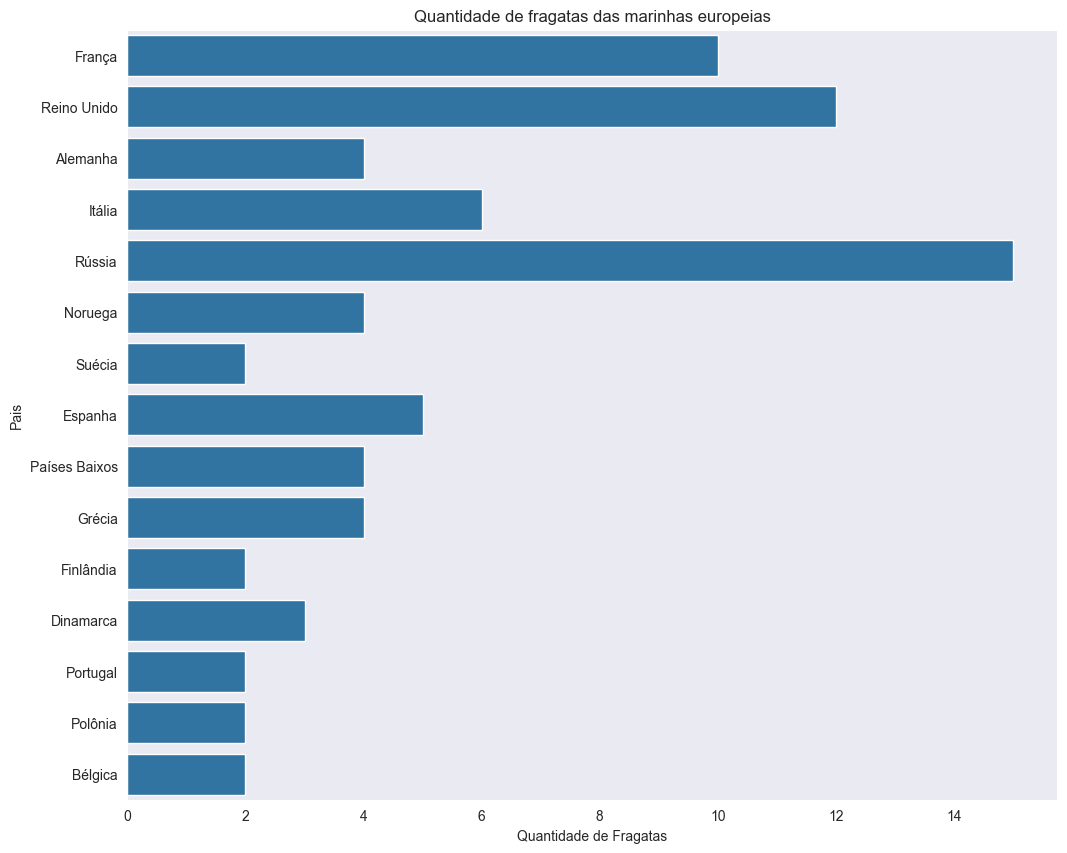

In [5]:
sns.set_style('dark')
plt.figure(figsize=(12,10))
plt.title('Quantidade de fragatas das marinhas europeias');
sns.barplot(data=df, x='Fragatas', y='País', orient='h')
plt.xlabel('Quantidade de Fragatas')
plt.ylabel('Pais');


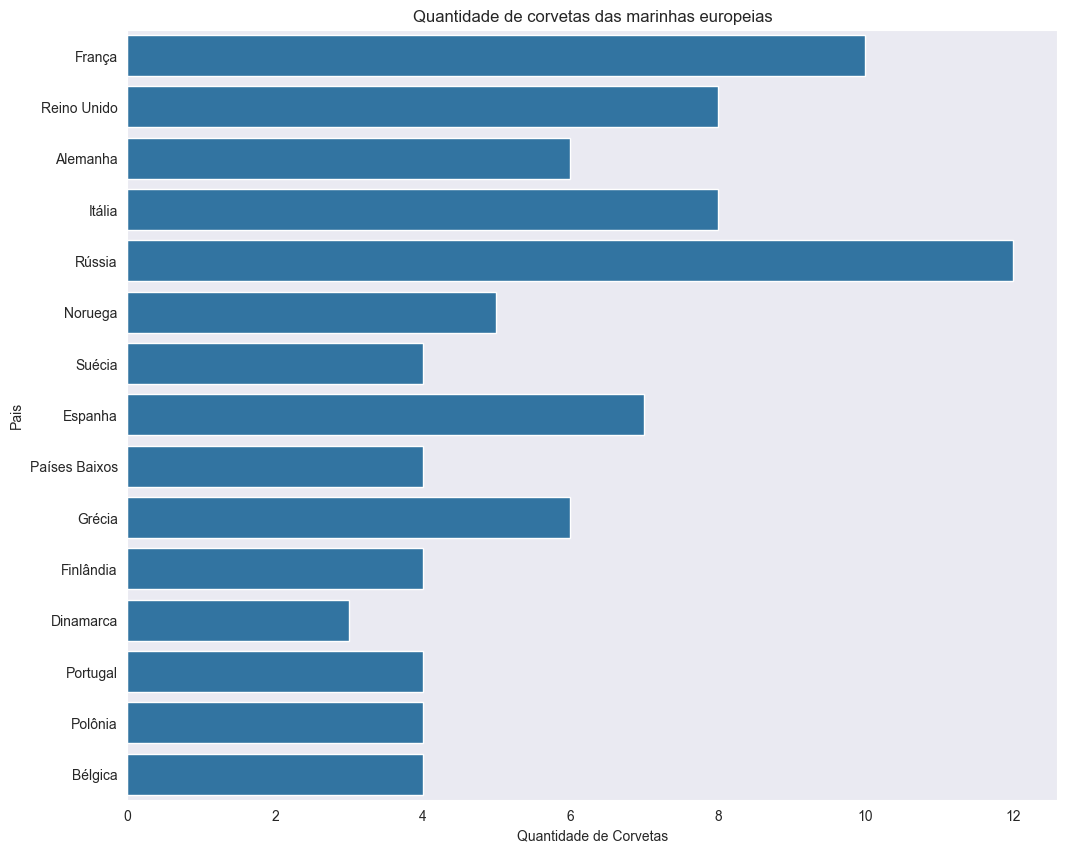

In [6]:
sns.set_style('dark')
plt.figure(figsize=(12,10))
plt.title('Quantidade de corvetas das marinhas europeias');
sns.barplot(data=df, x='Corvetas', y='País', orient='h')
plt.xlabel('Quantidade de Corvetas')
plt.ylabel('Pais');


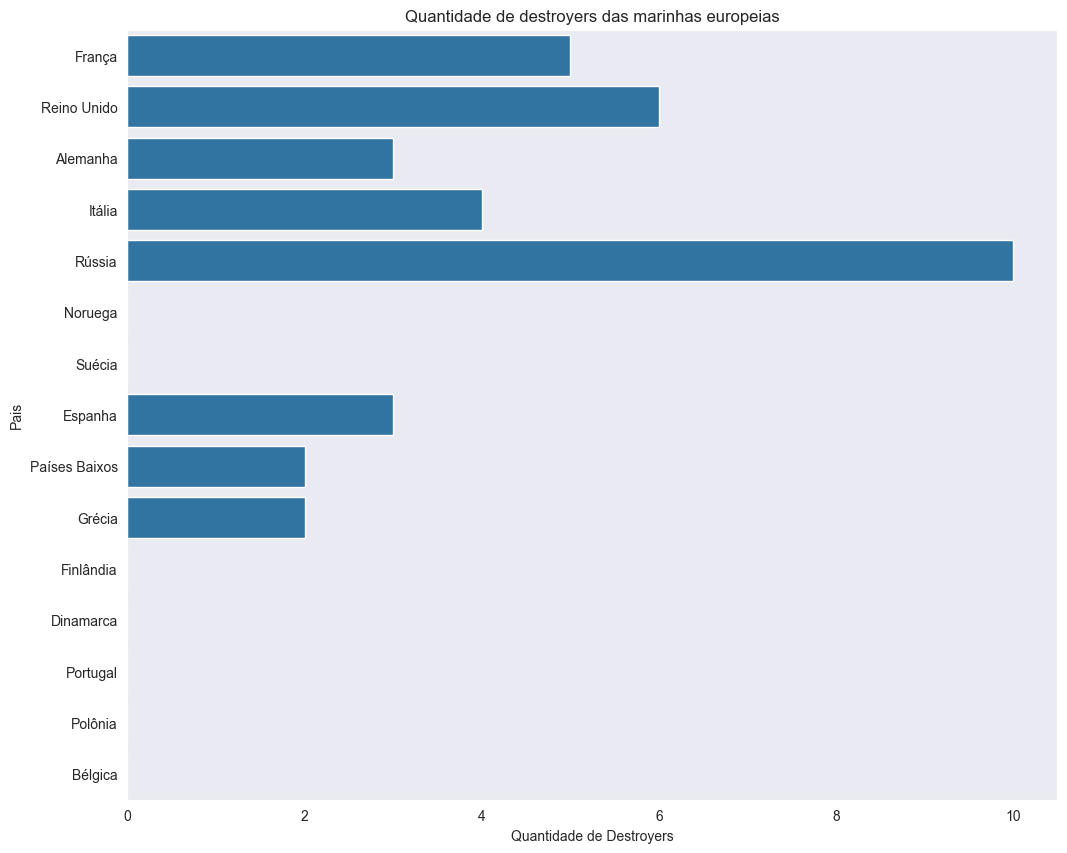

In [7]:
sns.set_style('dark')
plt.figure(figsize=(12,10))
plt.title('Quantidade de destroyers das marinhas europeias');
sns.barplot(data=df, x='Destroyers', y='País', orient='h')
plt.xlabel('Quantidade de Destroyers')
plt.ylabel('Pais');


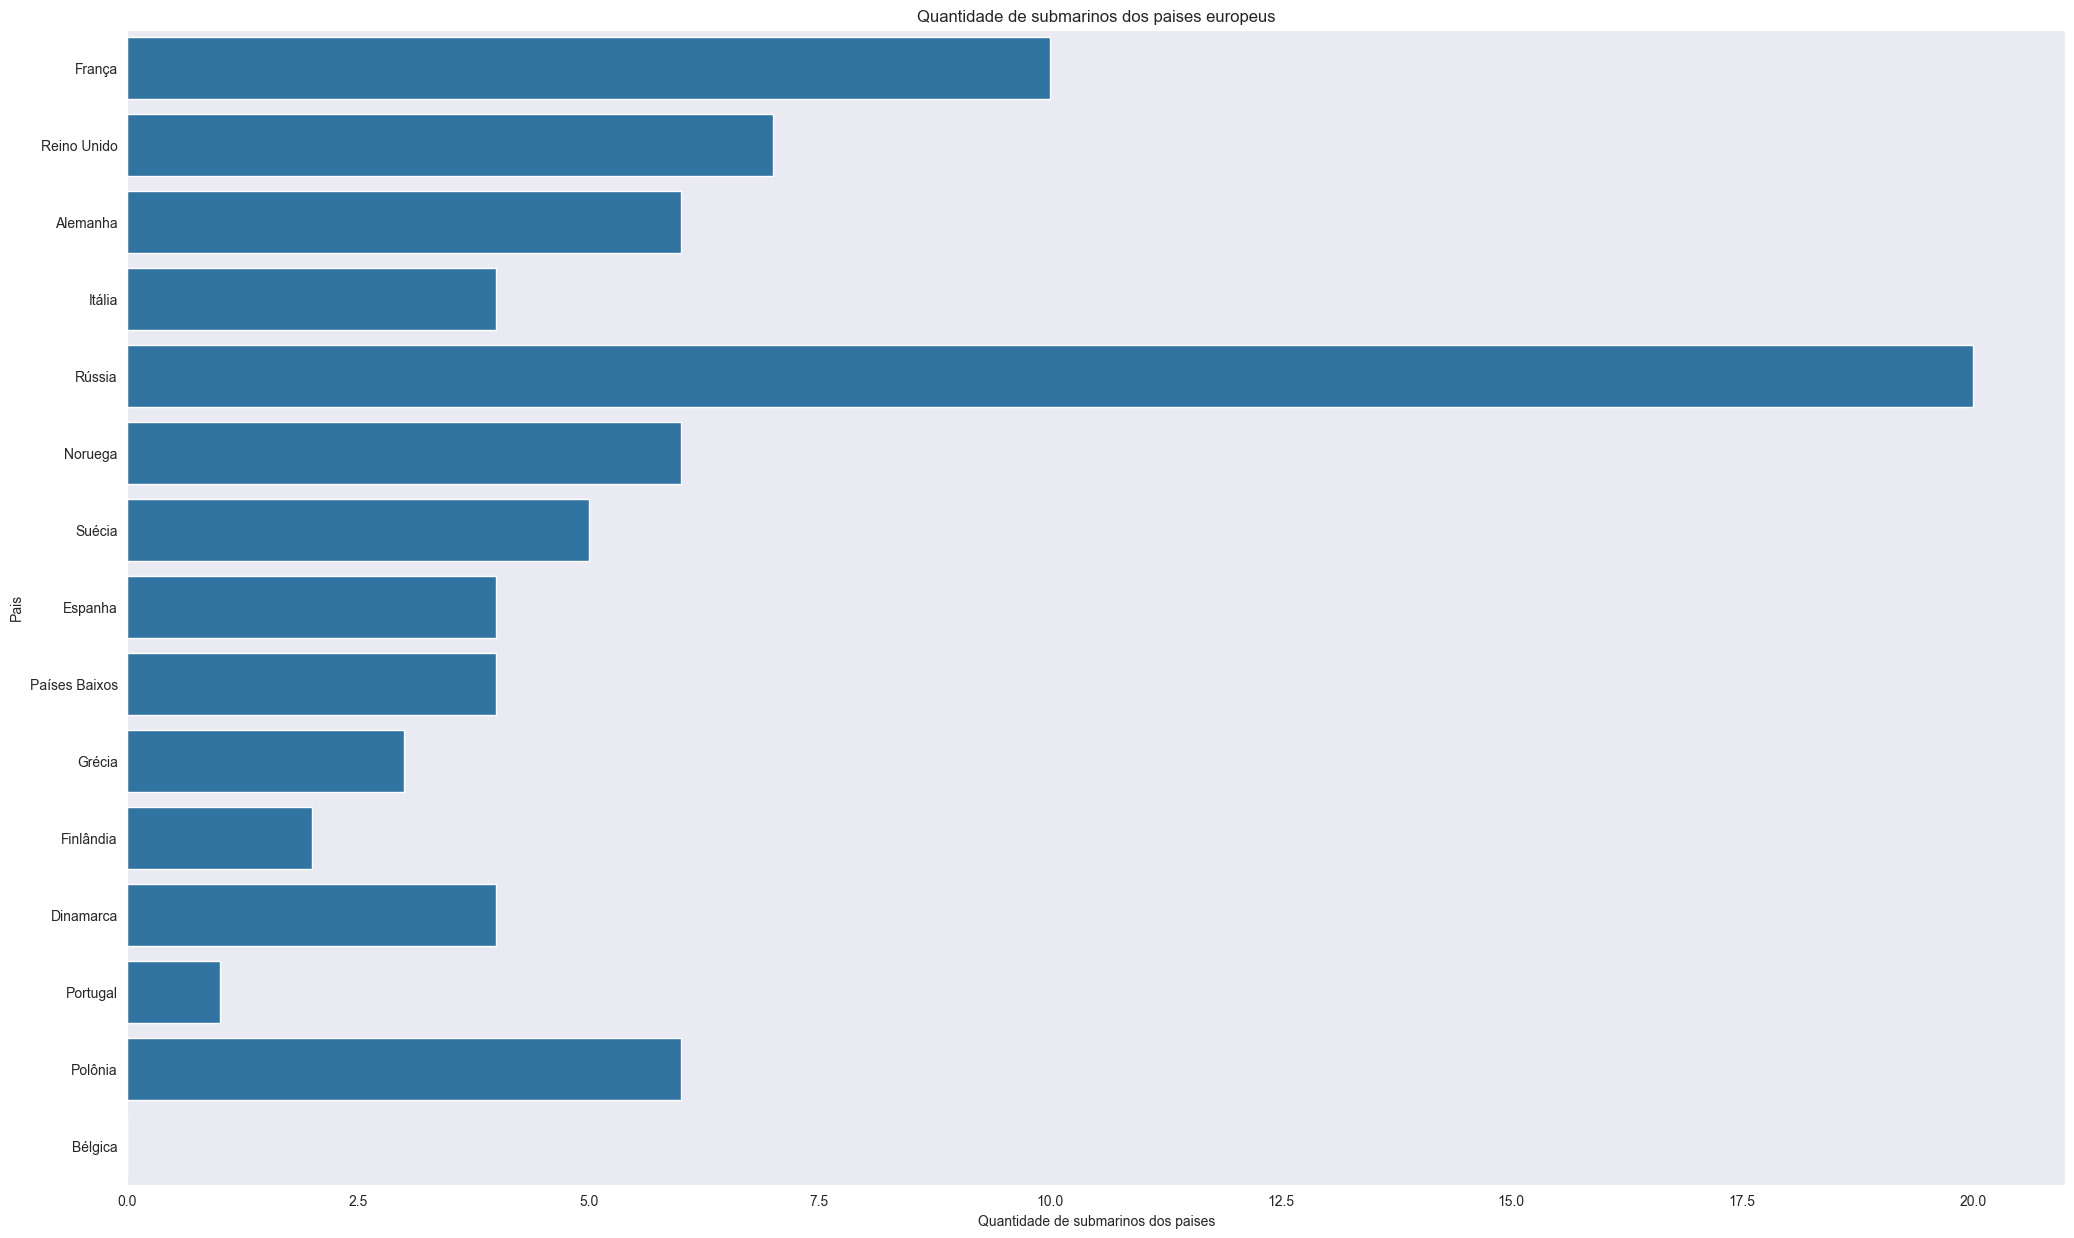

In [8]:
sns.set_style('dark')
plt.figure(figsize=(25,15))
plt.title('Quantidade de submarinos dos paises europeus')
sns.barplot(data=df, x='Submarinos', y='País', orient='h')
plt.xlabel('Quantidade de submarinos dos paises')
plt.ylabel('Pais');

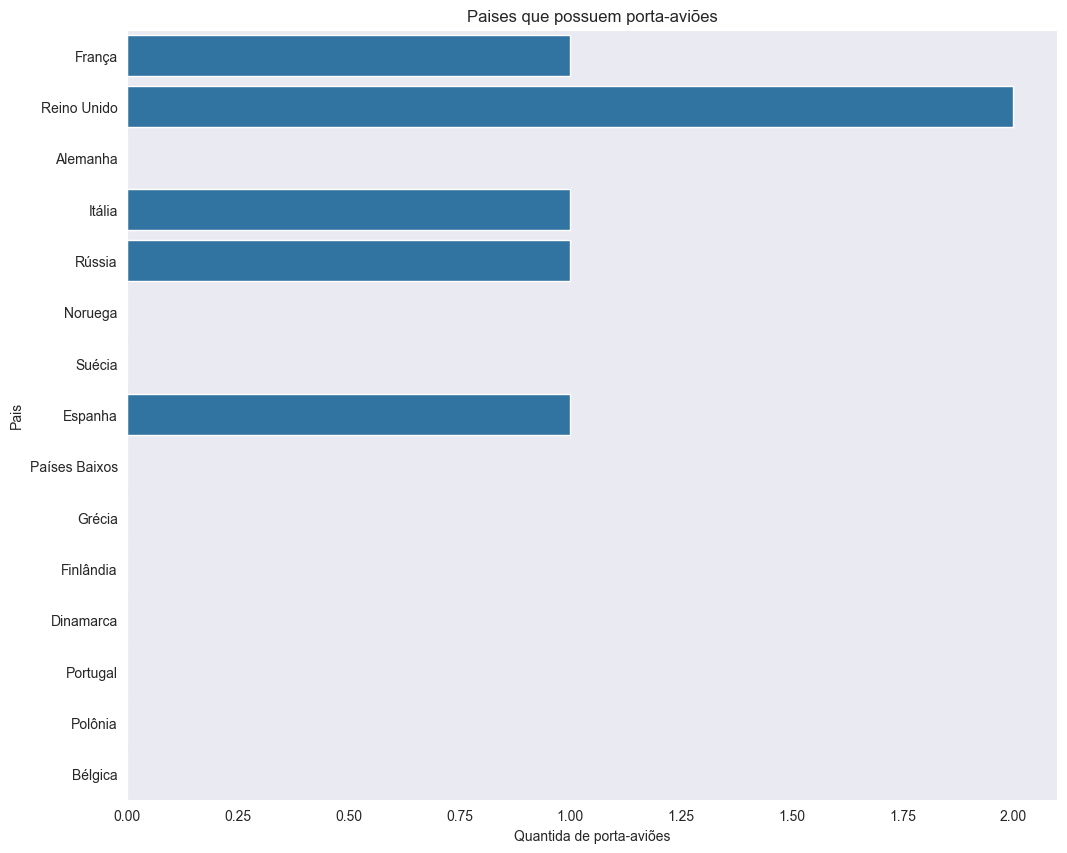

In [9]:
sns.axes_style('darkgrid')
plt.figure(figsize=(12,10))
plt.title('Paises que possuem porta-aviões')
sns.barplot(data=df, x='Porta-aviões', y='País');
plt.xlabel('Quantida de porta-aviões')
plt.ylabel('Pais');


# As Marinhas Europeias Mais Poderosas:
Ao se analisar os dados sobre as forças navais europeias, a Rússia, a França e o Reino Unido se destacam de forma consistente. Essas potências marítimas possuem frotas substanciais, com um arsenal considerável de corvetas, fragatas, destroyers e submarinos. Essa superioridade naval é resultado de investimentos contínuos em tecnologia naval, além de uma longa tradição marítima e de grandes ambições geopolíticas. A Rússia, por exemplo, tem investido significativamente em sua frota do Mar Negro, enquanto a França e o Reino Unido mantêm uma presença naval global, com porta-aviões e submarinos nucleares. Essa superioridade naval reflete não apenas o poder militar dessas nações, mas também sua capacidade de projetar poder em diversas regiões do globo.

# Análise dos Orçamentos das Marinhas Europeias 

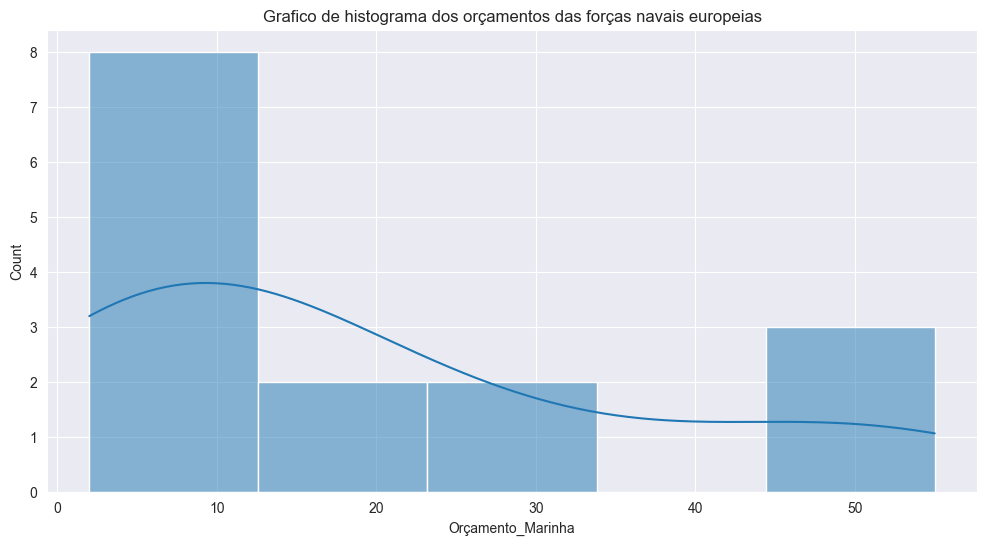

In [42]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
plt.title('Grafico de histograma dos orçamentos das forças navais europeias')
sns.histplot(data=df, x='Orçamento_Marinha', kde=True);


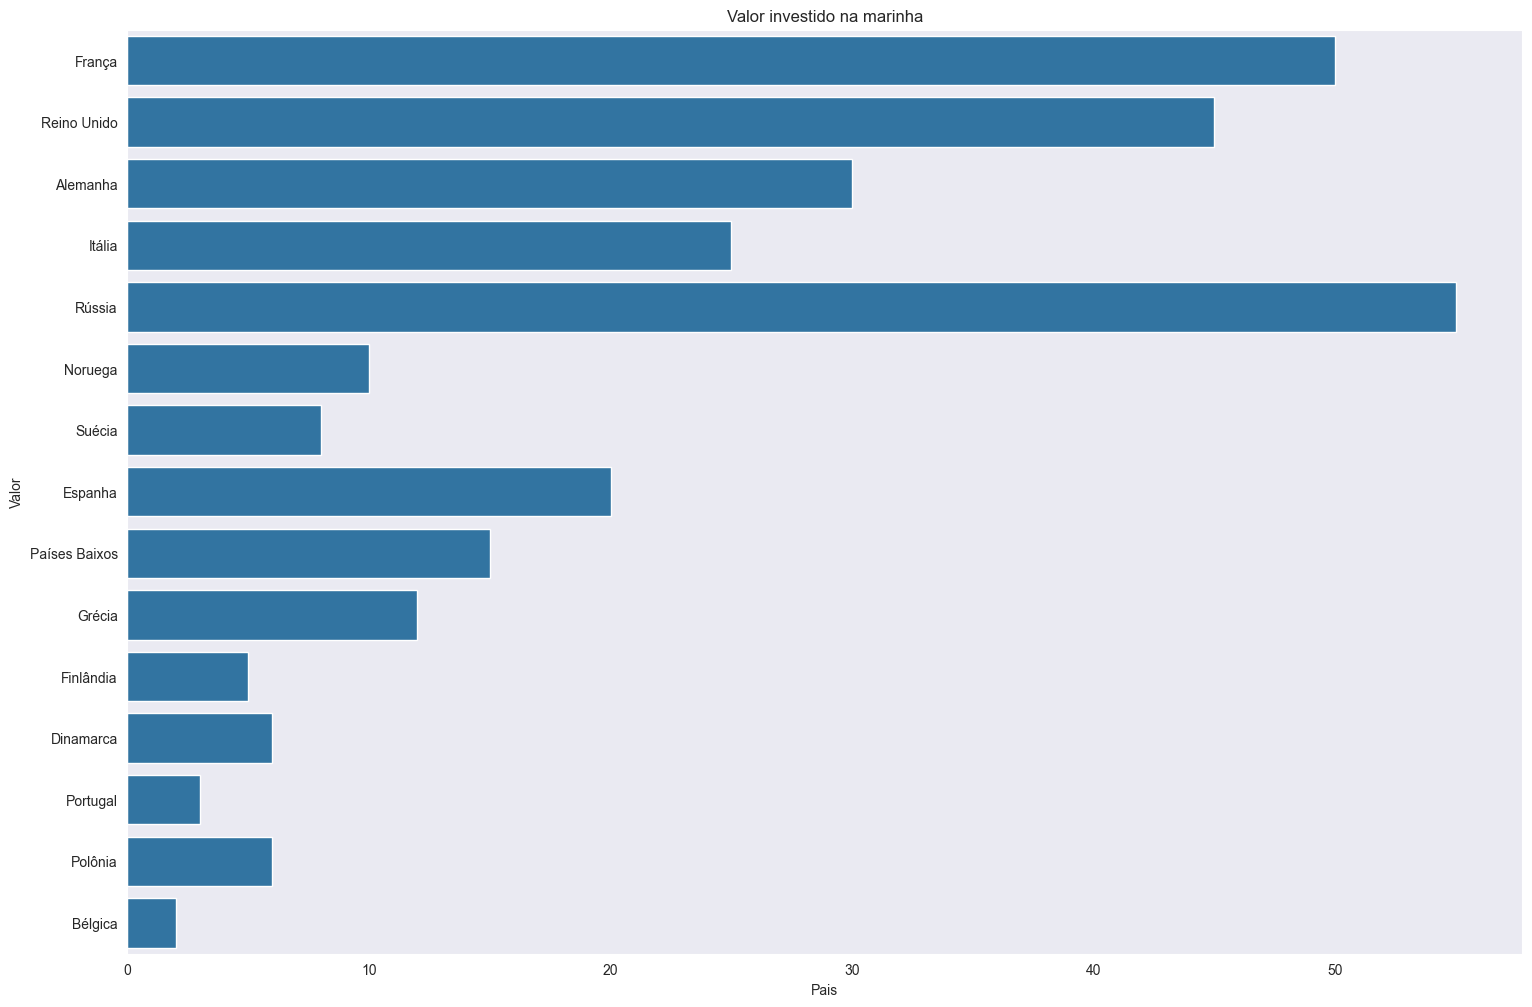

In [10]:
sns.set_style('dark')
plt.figure(figsize=(18,12))
plt.title('Valor investido na marinha')
sns.barplot(data=df, x='Orçamento_Marinha', y='País', orient='h')
plt.xlabel('Pais')
plt.ylabel('Valor');

# Analise da capacidade ofenciva

In [55]:
correlacao = df[['Orçamento_Marinha','Quantidade_Misseis', 'Quantidade_Torpedos']]
correlacao.corr()

,Orçamento_Marinha,Quantidade_Misseis,Quantidade_Torpedos
Orçamento_Marinha,1.000000,0.810280,0.924528
Quantidade_Misseis,0.810280,1.000000,0.967086
Quantidade_Torpedos,0.924528,0.967086,1.000000


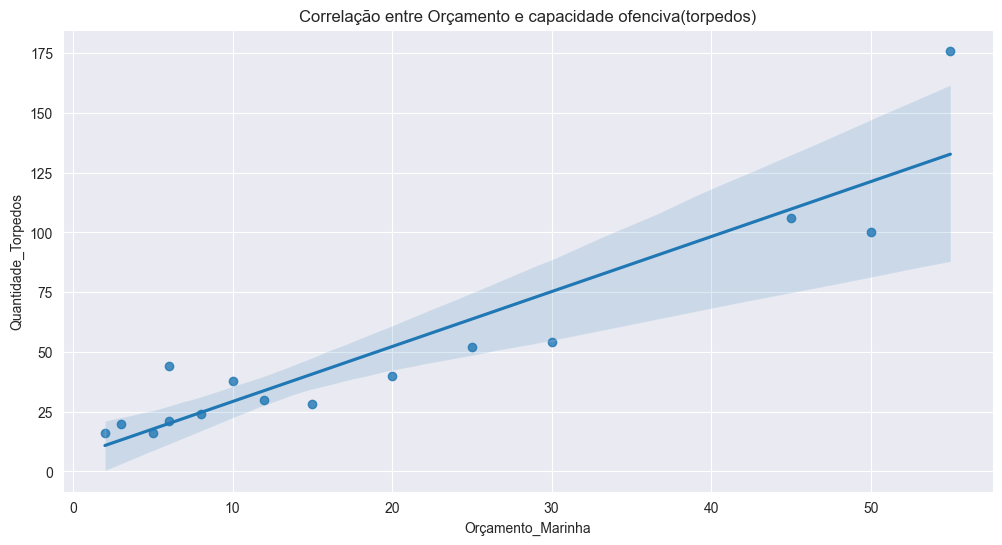

In [58]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
plt.title('Correlação entre Orçamento e capacidade ofenciva(torpedos)')
sns.regplot(data=df, x='Orçamento_Marinha', y='Quantidade_Torpedos');


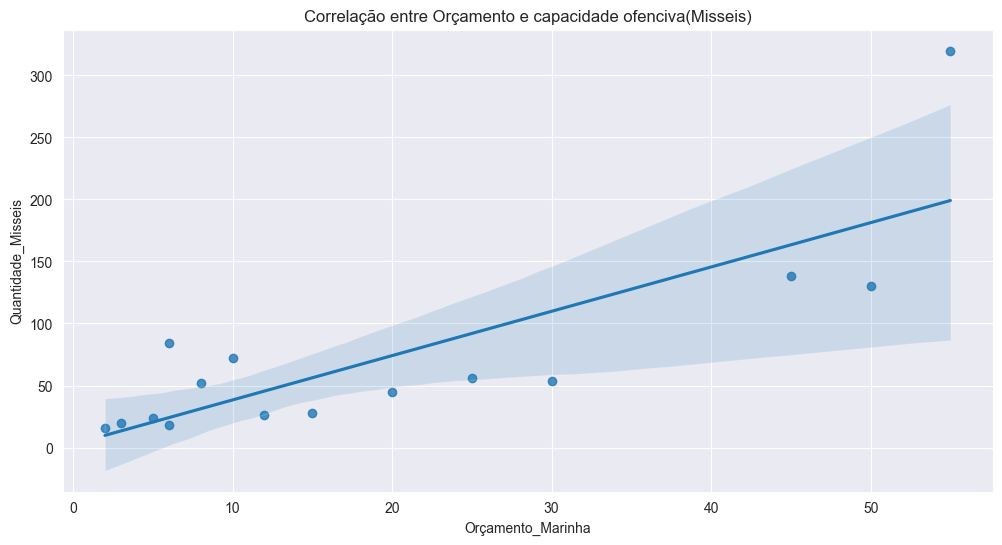

In [59]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
plt.title('Correlação entre Orçamento e capacidade ofenciva(Misseis)')
sns.regplot(data=df, x='Orçamento_Marinha', y='Quantidade_Misseis');


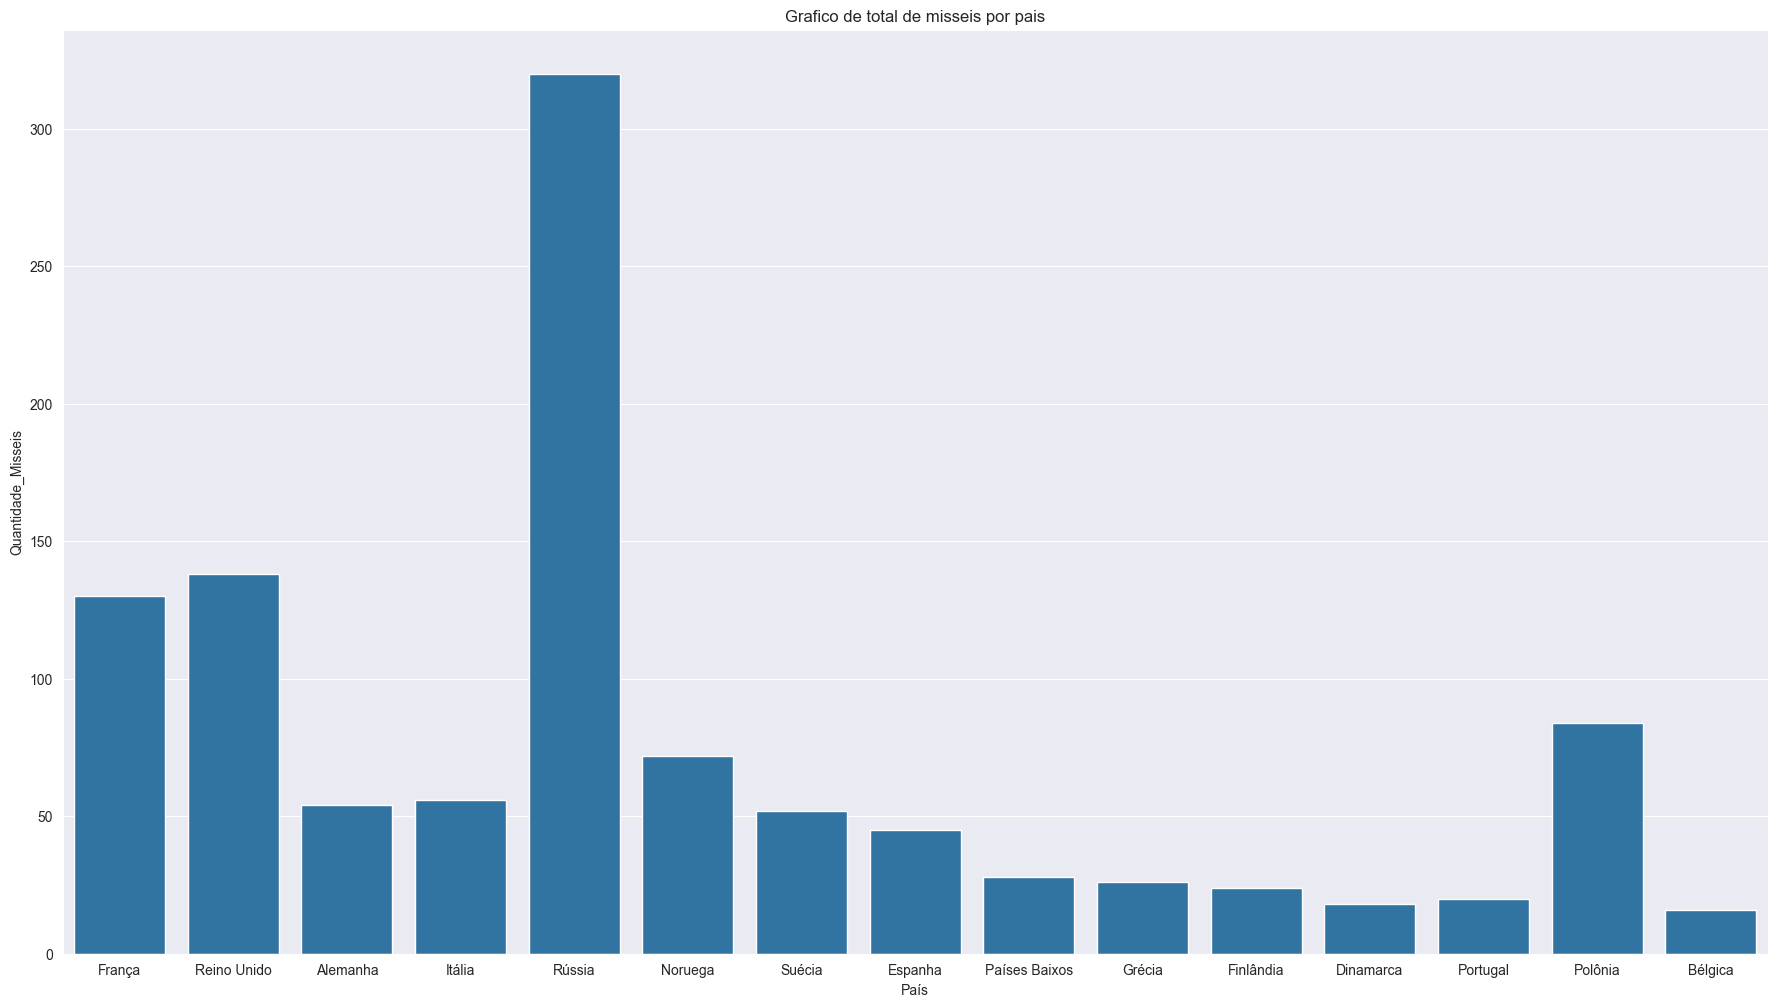

In [48]:
sns.set_style('darkgrid')
plt.figure(figsize=(22,12))
plt.title('Grafico de total de misseis por pais')
grafico = sns.barplot(data=df, x='País', y='Quantidade_Misseis')

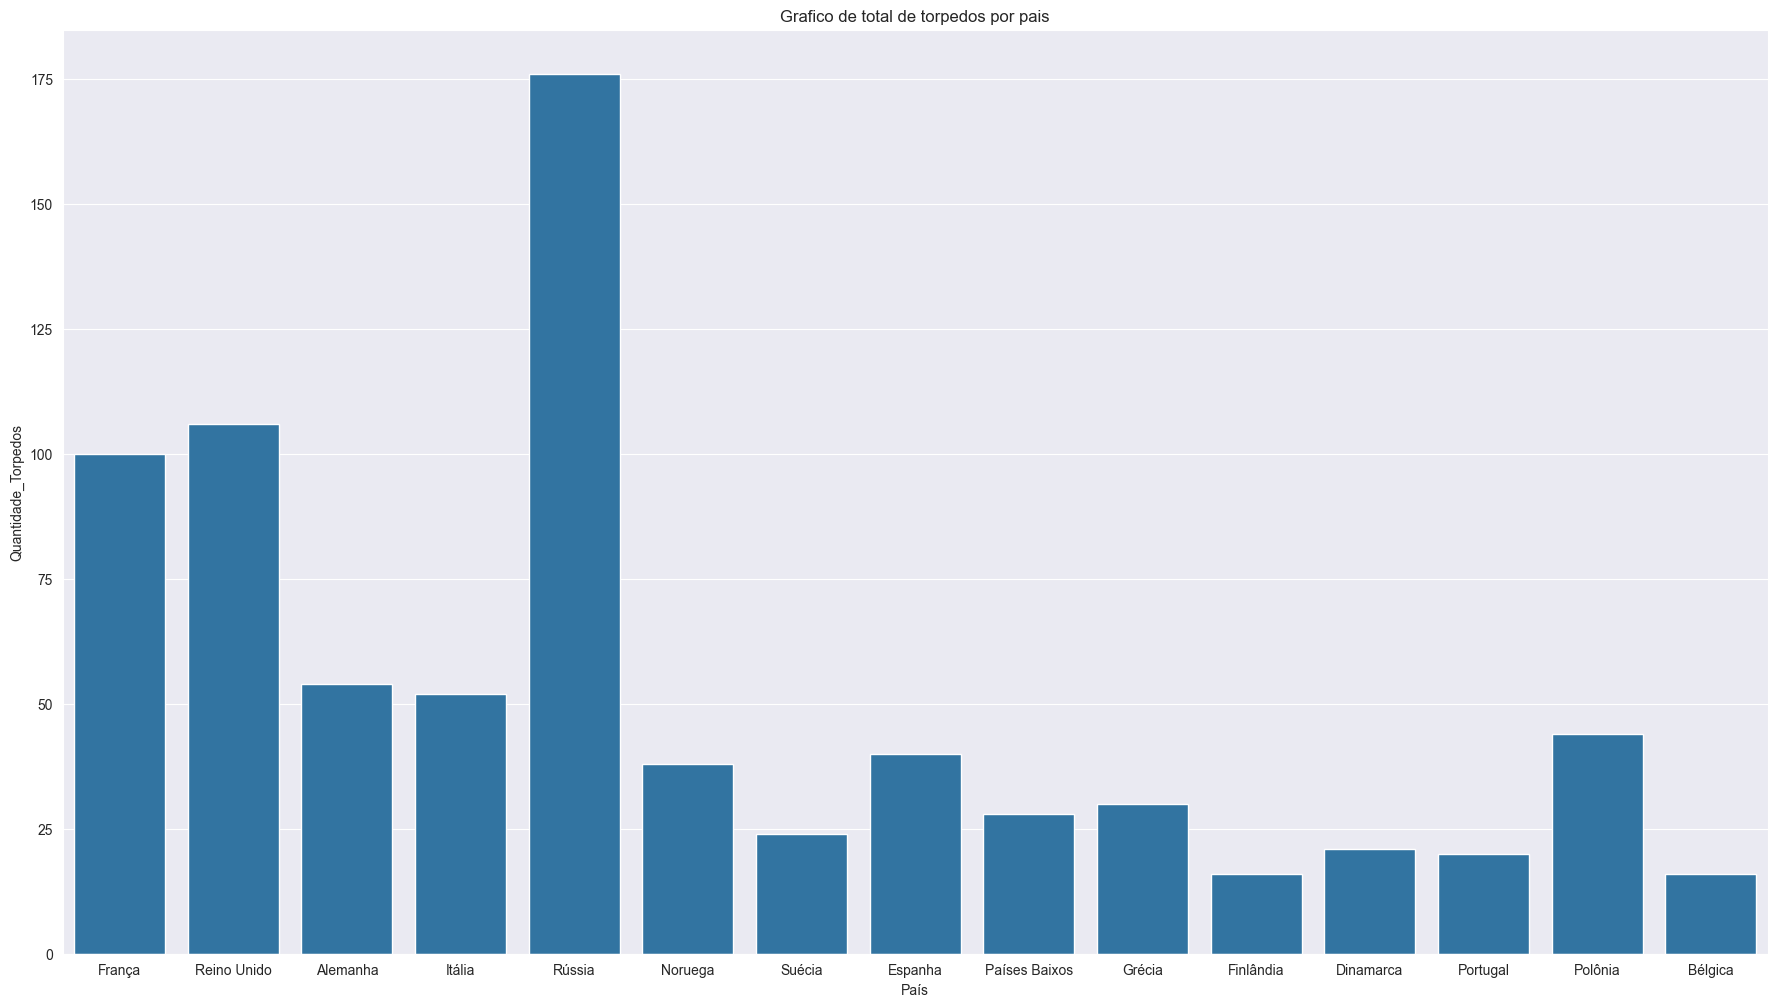

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(22,12))
plt.title('Grafico de total de torpedos por pais')
grafico = sns.barplot(data=df, x='País', y='Quantidade_Torpedos');

# Manipulando os dados
separando os dados entre países pertecentes a OTAN e somando os valores

In [34]:
otan = df[df['País']  != 'Rússia'].iloc[:, 1:]
russia = df[df['País'] == 'Rússia'].iloc[:, 1:]

dados_otan = pd.DataFrame({
    'Marinha':['Otan','Russia'],
    'Corvetas':[otan['Corvetas'].sum(), russia['Corvetas'].sum()],
    'Fragatas':[otan['Fragatas'].sum(), russia['Fragatas'].sum()],
    'Destroyers':[otan['Destroyers'].sum(), russia['Destroyers'].sum()],
    'Submarinos':[otan['Submarinos'].sum(), russia['Submarinos'].sum()],
    'Porta-aviões':[otan['Porta-aviões'].sum(), russia['Porta-aviões'].sum()],
    'Total_Misseis':[otan['Quantidade_Misseis'].sum(), russia['Quantidade_Misseis'].sum()],
    'Total_Torpedos':[otan['Quantidade_Torpedos'].sum(), russia['Quantidade_Torpedos'].sum()],
    'Orçamento':[otan['Orçamento_Marinha'].sum(), russia['Orçamento_Marinha'].sum()],

})
dados_otan.head()

,Marinha,Corvetas,Fragatas,Destroyers,Submarinos,Porta-aviões,Total_Misseis,Total_Torpedos,Orçamento
0,Otan,77,62,25,62,5,763,589,237
1,Russia,12,15,10,20,1,320,176,55
